In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [27]:
df = pd.read_csv('50_Startups.csv')
df.head()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [28]:
X = df.drop("Profit", axis = 1)
y = df["Profit"]

In [29]:
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1)
X_train, y_train = X[:30], y[:30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape

((40, 3), (40,))

<Axes: >

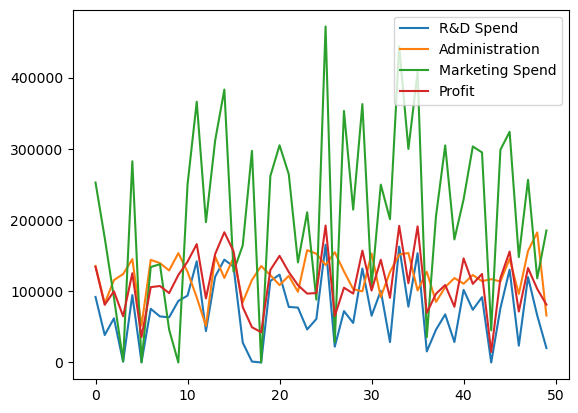

In [30]:
df.plot()

In [31]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [32]:
model.score(X_test, y_test)

0.9654669178592131

In [33]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_test, val_preds),
              "Training RMSLE" : rmsle(y_train, train_preds),
              "Valid RMSLE" : rmsle(y_test, val_preds),
              "Training R^2" : model.score(X_train, y_train),
              "Valid R^2" : model.score(X_test, y_test)
    }
    return scores

In [34]:
model.fit(X_train, y_train)
show_scores(model)

{'Training MAE': 3368.315629999983,
 'Valid MAE': 7201.828349999996,
 'Training RMSLE': 0.12593801421704942,
 'Valid RMSLE': 0.08917965518377023,
 'Training R^2': 0.9866332757926948,
 'Valid R^2': 0.958518792386215}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth" : [None, 3, 5],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2),
           "max_features" : [0.5, 1.0, "sqrt"]
}
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = rf_grid,
                              n_iter = 10,
                              cv = 5,
                              verbose = True)
rs_model.fit(X_train, y_train)
rs_model.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8657912569994113

In [36]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'max_depth': None}

In [37]:
show_scores(rs_model)

{'Training MAE': 7798.262041063889,
 'Valid MAE': 9658.23807092617,
 'Training RMSLE': 0.2237863015753173,
 'Valid RMSLE': 0.1306113501530278,
 'Training R^2': 0.9100564263218068,
 'Valid R^2': 0.8987561652585052}

In [51]:
ideal_model = RandomForestRegressor(n_estimators = 70,
        min_samples_split = 4,
        min_samples_leaf = 1,
        max_features =  1.0,
        max_depth = 3)
ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)

0.9566063355287309

In [52]:
show_scores(ideal_model)

{'Training MAE': 4624.7684101986515,
 'Valid MAE': 7712.934242462305,
 'Training RMSLE': 0.16410228947773367,
 'Valid RMSLE': 0.10735178978129328,
 'Training R^2': 0.9759334666081122,
 'Valid R^2': 0.9566063355287309}

In [60]:
# Since our ideal model has the highest accuracy, therefore we save it 
pickle.dump(ideal_model, open('best_model.pkl', 'wb'))